<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_7_S6_SHW.ipynb"><< Sentinel-6 significant wave height</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 European Union <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT), Vinca Rosmorduc (CLS)

<html>
<div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-s6"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg?style=flat&logo=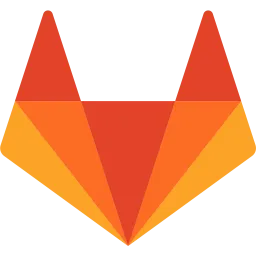" alt="Open in EUMETLAB"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://user.eumetsat.int/search-view?sort=startDate%20desc&facets=%7B%22contentTypes%22:%5B%22Resources%7CSoftware%20%26%20code%22%5D,%22theme%22:%5B%22Marine%22,%22Marine%7CMaritime%20safety%22,%22Marine%7COcean%20biogeochemistry%22,%22Marine%7COcean%20dynamics%22,%22Marine%7CWater%20quality%22%5D,%22org-satellite-sensor%22:%5B%22EUMETSAT%7CSentinel-6%22,%22EUMETSAT%7CSentinel-6%7CAMR-C%22,%22EUMETSAT%7CSentinel-6%7CDORIS%22,%22EUMETSAT%7CSentinel-6%7CGNSS-RO%22,%22EUMETSAT%7CSentinel-6%7CLRA%22,%22EUMETSAT%7CSentinel-6%7CPoseidon-4%22%5D%7D"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg?style=flat&logo=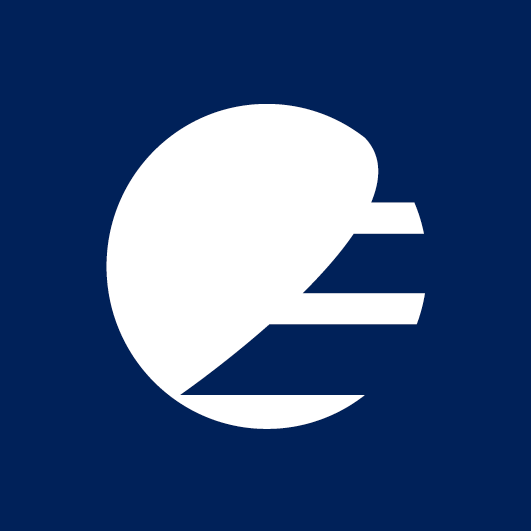" alt="Open in user portal"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-s6/HEAD?labpath=1_S6_introductory%2F1_8_S6_WS.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Launch on Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/learn-s6/1_S6_introductory/1_8_S6_WS.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Launch on WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div> 
</html>

<div class="alert alert-block alert-success">
<h3>Learn Sentinel-6: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook:
- **<a href="1_1a_S6_data_access_SFTP.ipynb" target="_blank">1_1a_S6_data_access_SFTP</a>**; this will download the required Sentinel-6 products for this notebook.

</div>
<hr>

# 1.8 Sentinel-6 wind speed 

### Data used

| Dataset | EUMETSAT collection ID| EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:--------:|
| Sentinel-6 Poseidon-4 Altimetry level 2 High Resolution  | EO:EUM:DAT:0855 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0855" target="_blank">Description</a> | EO:EUM:DAT:0855| <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3A0855" target="_blank">Description</a> |

### Learning outcomes

At the end of this notebook you will know;
* How to read wind speed data from Sentinel-6 level-2 altimetry files.
* How to plot wind speed data using appropriate flags.

### Outline

As discussed in the previous notebooks - altimetry measurements contain more information about sea state than just the sea-level. Characteristics of the waveform can be used to estimate other parameters, including wind speed. Backscatter is related to the surface mean square slope, and thus, to wind speed. Stronger winds result in a higher mean square slope which is related to smaller backscatter values.

In this notebook, we'll take a look at how to plot this data from a Sentinel-6 altimetry level-2 product.


<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Reading Poseidon-4 level-2 wind speed data](#section1)
 1. [Plotting Poseidon-4 level-2 wind speed data](#section2)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
# library imports
import cartopy
import cmocean
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import os
import warnings
import glob

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 12})

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Reading Poseidon-4 level-2 wind speed data
[Back to top](#TOC_TOP)

</div>

As in the previous notebooks in this series, we will use a Sentinel-6 level-2 altimetry file here. For this instance we only need to open the standard measurement file.

In [2]:
# selecting SAFE directories
SAFE_product = glob.glob(os.path.join(os.getcwd(), 'products','S6A_P4_2__HR*_NT_*','*.nc'))[0]

In [3]:
# read data
ds_01 = xr.open_dataset(SAFE_product, group="data_01")
ds_01_ku = xr.open_dataset(SAFE_product, group="data_01/ku")
ds_01.close()
ds_01_ku.close()

In preparation for plotting the data, we will also read in the relevant flag information for the wind speed field. In this case this is the "sig0_ocean_qual" and "surface_classification_flag" fields.

In [4]:
flags_ws = np.array(ds_01_ku.sig0_ocean_qual).astype(float)
flags_sc = np.array(ds_01.surface_classification_flag).astype(float)
valid_vals = np.where((flags_ws == 0.0) & (flags_sc == 0.0))

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Plotting Poseidon-4 level-2 wind speed data
[Back to top](#TOC_TOP)

</div>

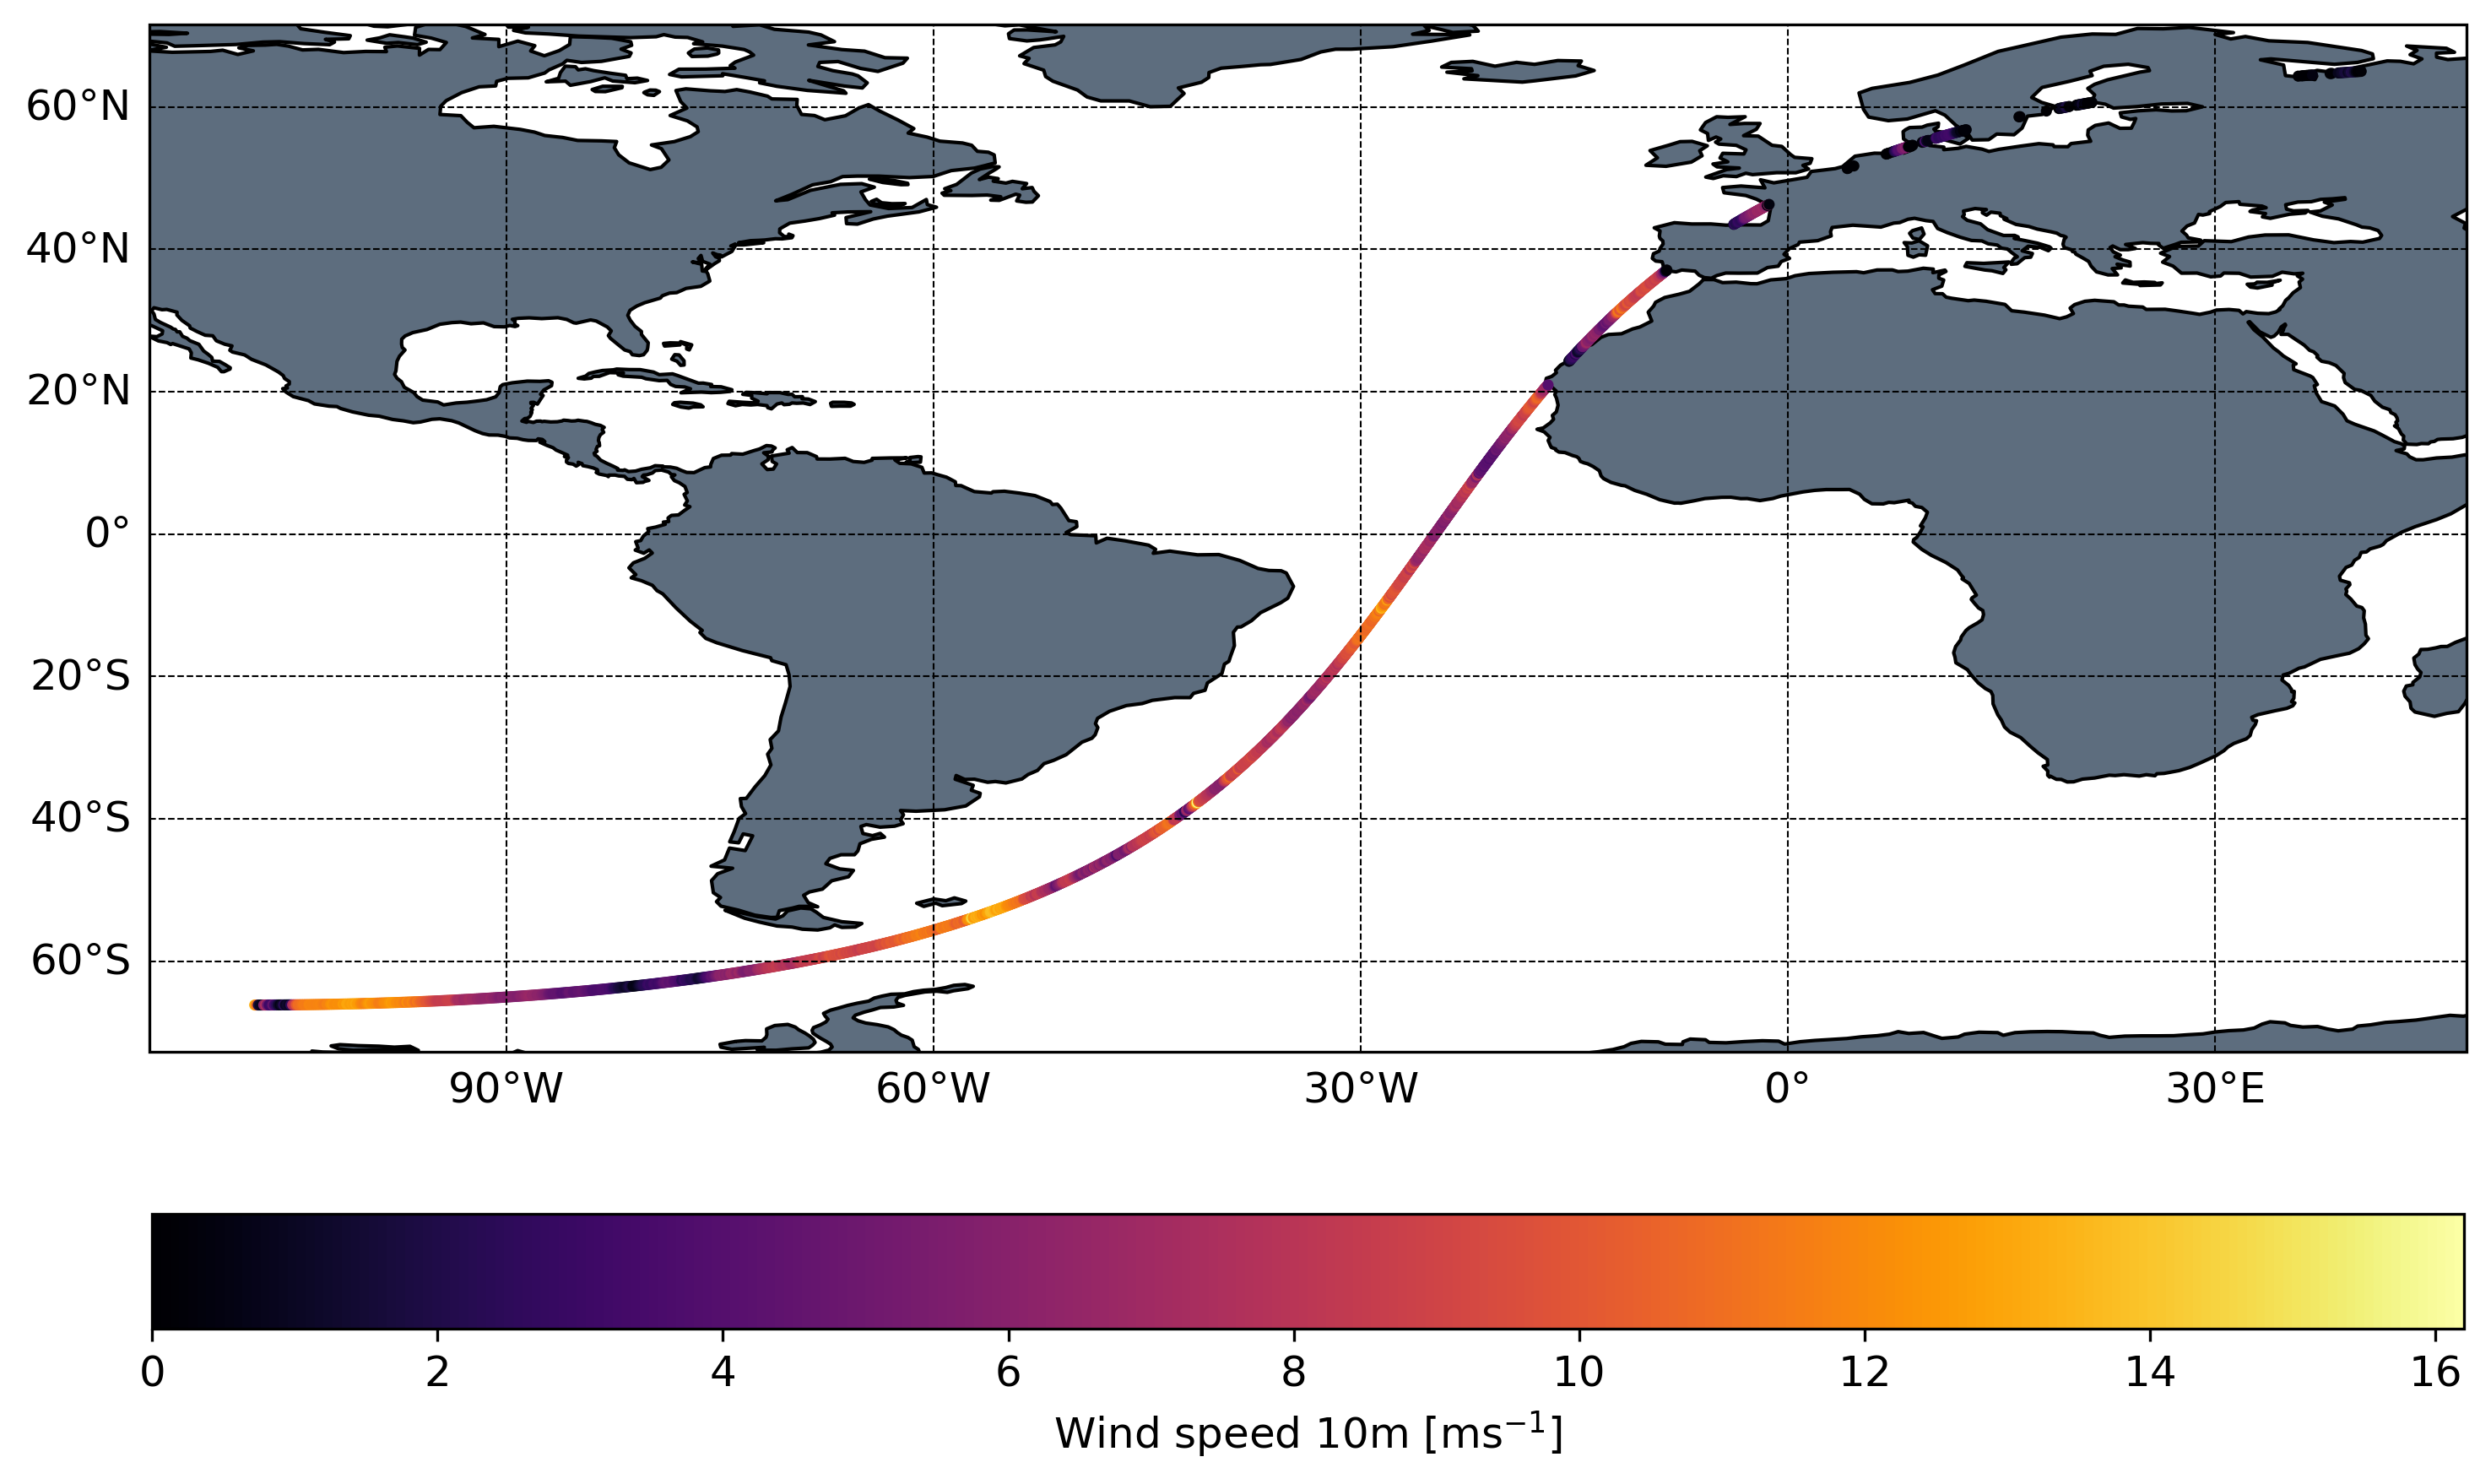

In [5]:
# plot the flagged track data for geophysical variables
fig, m = plt.subplots(1, 1, figsize=(10, 10), dpi=300, subplot_kw={"projection": cartopy.crs.PlateCarree()})

vmin = 0
vmax = np.nanpercentile(ds_01.wind_speed_alt, 92)
f1 = m.scatter(ds_01.longitude[valid_vals], ds_01.latitude[valid_vals], c=ds_01.wind_speed_alt[valid_vals], s=10, cmap="inferno", marker='o', edgecolors=None, 
               linewidth=0.0, vmin=vmin, vmax=vmax)

m.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='k', facecolor='#5D6D7E')
g1 = m.gridlines(draw_labels = True, zorder=20, color='0.0', linestyle='--', linewidth=0.5)
g1.top_labels = False
g1.right_labels = False
g1.xlabel_style = {'color': 'black'}
g1.ylabel_style = {'color': 'black'}
m.set(facecolor = "1.0")
m.set_aspect(0.5)

cbar = plt.colorbar(f1, ax=m, orientation="horizontal", fraction=0.05, pad=0.07)
cbar.set_label('Wind speed 10m [ms$^{-1}$]')


plt.tight_layout()
plt.savefig('1_8_S6_WS.png')

The figure shows the variability in wind speed along the same track as looked at in the previous notebook. Again you can see high values in the wind speed (as with the SWH) in the Southern Ocean.

<hr>
<a href="../Index.ipynb"><< Index</a>
<br>
<a href="./1_7_S6_SHW.ipynb"><< Sentinel-6 significant wave height</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>